<a href="https://colab.research.google.com/github/yeric1789/CMSC320_Final_Project/blob/main/NoteBookFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 

In [95]:
sns.set_style("darkgrid")

#Loading the data 

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data = pd.read_csv('/content/drive/MyDrive/CMSC320-Intro_data_science/FinalProject/Data/Data_Entry_2017.csv')
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


#Data exploration 
Each observation has an image and some more attributes attached to it, we will start by exploring some of the attributes first. 

In [37]:
data.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [38]:
overview = {}
for idx, des in enumerate(data['Finding Labels'].unique()):
  findings = des.split('|')
  data['Finding Labels'][idx] = findings
  
  # Get an overview of how many conditions we are working with
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

<ipython-input-38-3c5c1392162b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Finding Labels'][idx] = findings


In [40]:
def count_disease(findings):
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [41]:
data['Finding Labels'] = data.apply(lambda x: x['Finding Labels'].split('|'),axis = 1)

# Count the different 
overview = {}
for findings in data['Finding Labels']:
  for j in findings:
    if j in overview.keys():
      overview[j] += 1
    else: 
      overview[j] = 1

In [42]:
overview

{'Cardiomegaly': 2776,
 'Emphysema': 2516,
 'Effusion': 13317,
 'No Finding': 60361,
 'Hernia': 227,
 'Infiltration': 19894,
 'Mass': 5782,
 'Nodule': 6331,
 'Atelectasis': 11559,
 'Pneumothorax': 5302,
 'Pleural_Thickening': 3385,
 'Pneumonia': 1431,
 'Fibrosis': 1686,
 'Edema': 2303,
 'Consolidation': 4667}

Now we can create a one-hot encoding dataframe of all the labels being assigned to each image. After that it can be concatenated with the originial data matrix. 

In [ ]:
dummies = pd.DataFrame(np.zeros((len(data), len(overview.keys())), dtype=np.int), columns=overview.keys())
for i,des in enumerate(data['Finding Labels']):
  dummies.loc[i][des] = 1

#Concat horizontally
data = pd.concat([data,dummies],axis=1)

Now let's see which diseases are the most common, by plotting a histogram. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

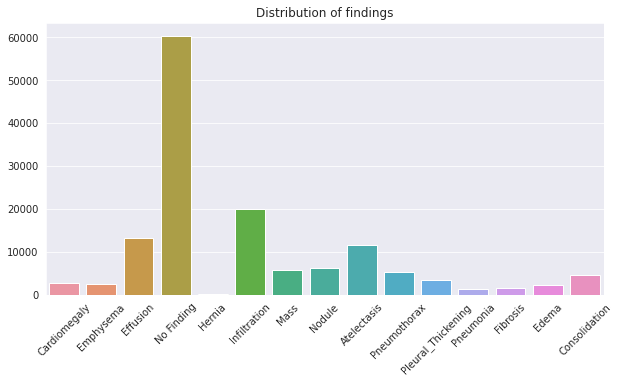

In [98]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(overview.keys())
y = list(overview.values())
sns.barplot(x,y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)